In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
arima_test_pred = pd.read_csv('/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Prediction/arima_test_pred.csv', header=None)
dnn_test_pred = pd.read_csv('/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Prediction/dnn_test_pred.csv', header=None)
lgbm_test_pred = pd.read_csv('/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Prediction/lgbm_test_pred.csv', header=None)
nn_test_pred = pd.read_csv('/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Prediction/nn_test_pred.csv', header=None)
rf_test_pred = pd.read_csv('/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Prediction/rf_test_pred.csv', header=None)
xgb_test_pred = pd.read_csv('/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Prediction/xgb_test_pred.csv', header=None)

In [91]:
all = pd.read_csv("/content/drive/MyDrive/Desktop/Advanced Analytics Edge/Project/Individual Work/Input/train.csv")
all = all.dropna(subset=['target','wap'])
all.isnull().sum()

all_sample = all
test = all_sample[all_sample["date_id"]>=475]
del all, all_sample

test_target = test["target"]

In [92]:
# convert test to dataframe
test_target = pd.DataFrame(test_target)
test_target.reset_index(drop=True, inplace=True)

In [93]:
# Create Baseline Model
simple_mapping = {
    1: 0.1,
    0: 0,
    -1: -0.1
}

baseline_test_pred = test['imbalance_buy_sell_flag'].map(simple_mapping)
baseline_test_pred = pd.DataFrame(baseline_test_pred)
baseline_test_pred.reset_index(drop=True, inplace=True)
baseline_test_pred.columns = ["target"]

In [94]:
baseline_test_pred["stock_id"] = [i for i in range(200)] * 330
arima_test_pred["stock_id"] = [i for i in range(200)] * 330
dnn_test_pred["stock_id"] = [i for i in range(200)] * 330
lgbm_test_pred["stock_id"] = [i for i in range(200)] * 330
nn_test_pred["stock_id"] = [i for i in range(200)] * 330
rf_test_pred["stock_id"] = [i for i in range(200)] * 330
xgb_test_pred["stock_id"] = [i for i in range(200)] * 330
test_target["stock_id"] = [i for i in range(200)] * 330

baseline_test_pred.columns = ['target', "stock_id"]
arima_test_pred.columns = ['target', "stock_id"]
dnn_test_pred.columns = ['target', "stock_id"]
lgbm_test_pred.columns = ['target', "stock_id"]
nn_test_pred.columns = ['target', "stock_id"]
rf_test_pred.columns = ['target', "stock_id"]
xgb_test_pred.columns = ['target', "stock_id"]
test_target.columns = ['target', "stock_id"]


In [68]:
arima_test_pred

,target,stock_id
0,6.511182e-01,0
1,2.830689e+00,1
2,-2.414776e+00,2
3,-2.323376e+00,3
4,-2.423109e+00,4
...,...,...
65995,0.000000e+00,195
65996,-2.804855e+00,196
65997,-2.470000e-146,197
65998,1.526728e-25,198


In [96]:
# plot MAE for each stock
baseline_test_pred['diff'] = np.abs(baseline_test_pred['target'] - test_target['target'])
arima_test_pred['diff'] = np.abs(arima_test_pred['target'] - test_target['target'])
dnn_test_pred['diff'] = np.abs(dnn_test_pred['target'] - test_target['target'])
lgbm_test_pred['diff'] = np.abs(lgbm_test_pred['target'] - test_target['target'])
nn_test_pred['diff'] = np.abs(nn_test_pred['target'] - test_target['target'])
rf_test_pred['diff'] = np.abs(rf_test_pred['target'] - test_target['target'])
xgb_test_pred['diff'] = np.abs(xgb_test_pred['target'] - test_target['target'])

baseline_test_pred_mae = baseline_test_pred.groupby('stock_id')['diff'].mean()
arima_test_pred_mae = arima_test_pred.groupby('stock_id')['diff'].mean()
dnn_test_pred_mae = dnn_test_pred.groupby('stock_id')['diff'].mean()
lgbm_test_pred_mae = lgbm_test_pred.groupby('stock_id')['diff'].mean()
nn_test_pred_mae = nn_test_pred.groupby('stock_id')['diff'].mean()
rf_test_pred_mae = rf_test_pred.groupby('stock_id')['diff'].mean()
xgb_test_pred_mae = xgb_test_pred.groupby('stock_id')['diff'].mean()

In [97]:
xgb_test_pred_mae

stock_id
0      3.504918
1      5.336264
2      4.870328
3      3.587457
4      2.784506
         ...   
195    3.782206
196    4.499117
197    5.385151
198    3.471224
199    4.656333
Name: diff, Length: 200, dtype: float64

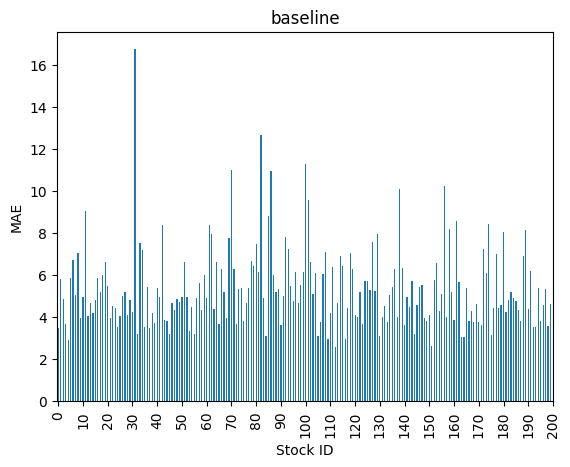

In [99]:
# plot bar chart for each model's mae
baseline_test_pred_mae.plot(kind='bar')
# Define the x-axis tick positions as integers from 0 to 200 with an interval of 10
x_positions = np.arange(0, 201, 10)

# Set x-axis ticks using the defined positions and format as integers
plt.xticks(x_positions, [str(int(val)) for val in x_positions])

# Add labels and a title
plt.xlabel('Stock ID')
plt.ylabel('MAE')
plt.title('baseline')

# Show the bar chart
plt.show()

In [110]:
lgbm_test_pred_mae[0:10]

stock_id
0    3.398737
1    5.383855
2    4.798773
3    3.663189
4    2.757444
5    5.934835
6    6.331550
7    4.997407
8    6.724904
9    3.837018
Name: diff, dtype: float64

In [114]:
baseline_test_pred_mae[151]

2.6218405292878786

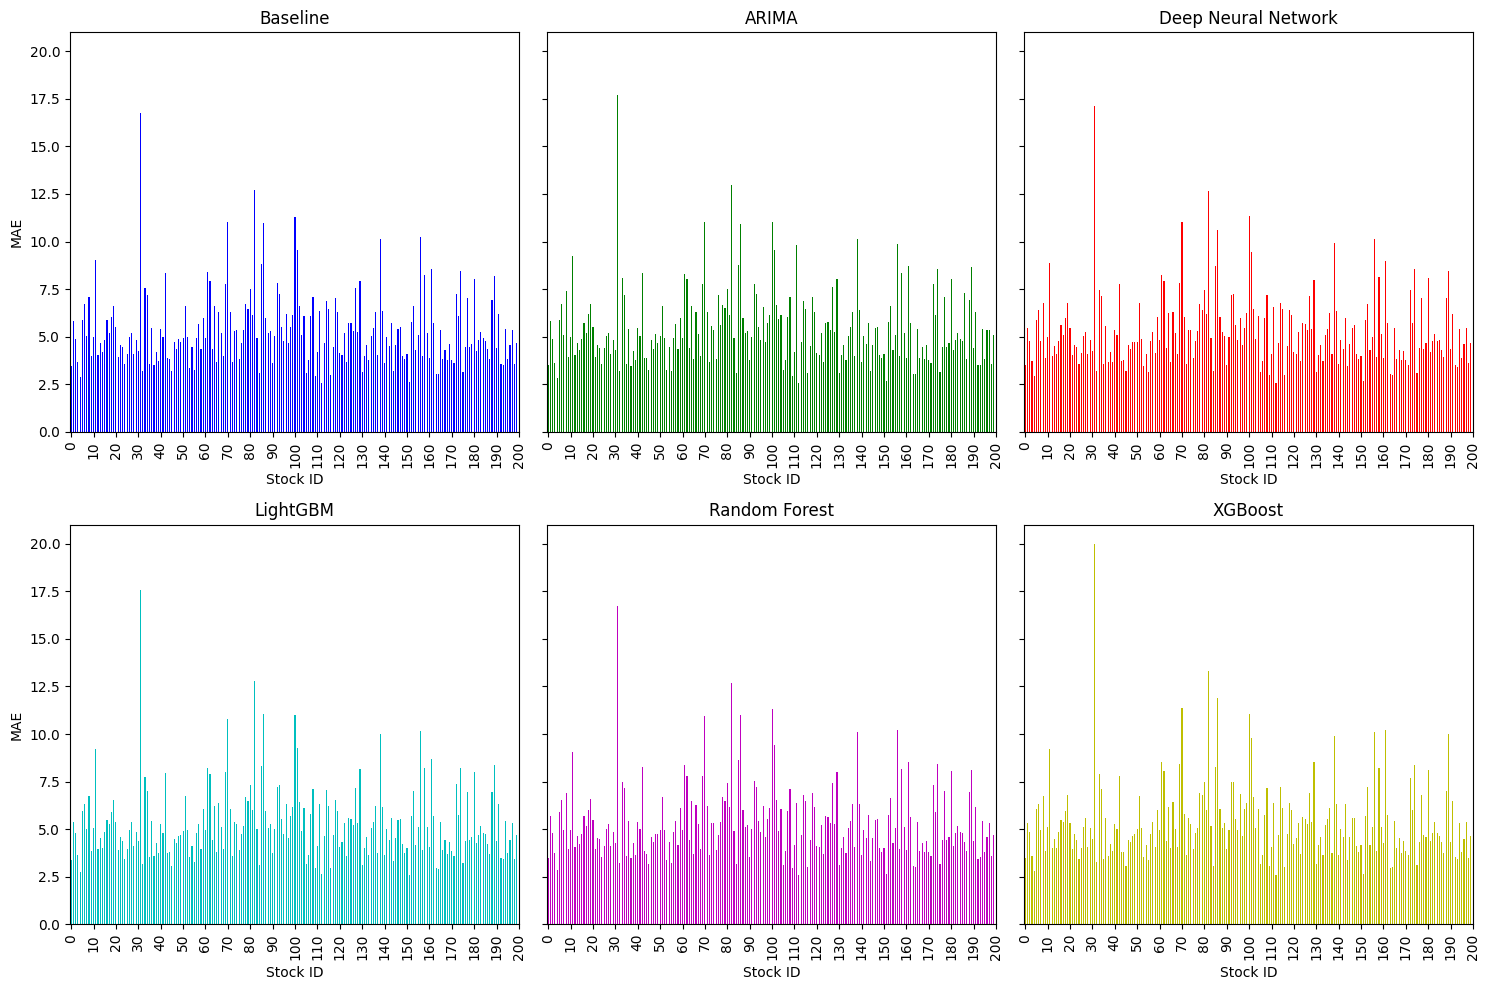

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 5 dataframes named df1, df2, df3, df4, and df5, each similar in size to arima_test_pred_mae
dataframes = [baseline_test_pred_mae, arima_test_pred_mae, dnn_test_pred_mae, lgbm_test_pred_mae, rf_test_pred_mae, xgb_test_pred_mae]
titles = ['Baseline', 'ARIMA', 'Deep Neural Network', 'LightGBM', 'Random Forest', 'XGBoost']

# Define a list of colors for each plot
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Create a 2x3 grid of subplots with shared y-axis
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()


for i, (df, title, color) in enumerate(zip(dataframes, titles, colors)):
    ax = axes[i]

    # Plot bar chart for the current dataframe with a specified color
    df.plot(kind='bar', ax=ax, color=color)

    # Define the x-axis tick positions as integers from 0 to 200 with an interval of 10
    x_positions = np.arange(0, 201, 10)

    # Set x-axis ticks using the defined positions and format as integers
    ax.set_xticks(x_positions)
    ax.set_xticklabels([str(int(val)) for val in x_positions])

    # Set labels and titles
    ax.set_xlabel('Stock ID')
    ax.set_ylabel('MAE')
    ax.set_title(title)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the combined figure
plt.show()

In [117]:
test_target[test_target['stock_id'] == 151]['target']

151      3.809929
351     -1.450181
551     -1.289845
751      0.339746
951      2.039671
           ...   
65151    0.510216
65351   -2.350211
65551   -2.670288
65751   -3.119707
65951   -1.659989
Name: target, Length: 330, dtype: float64

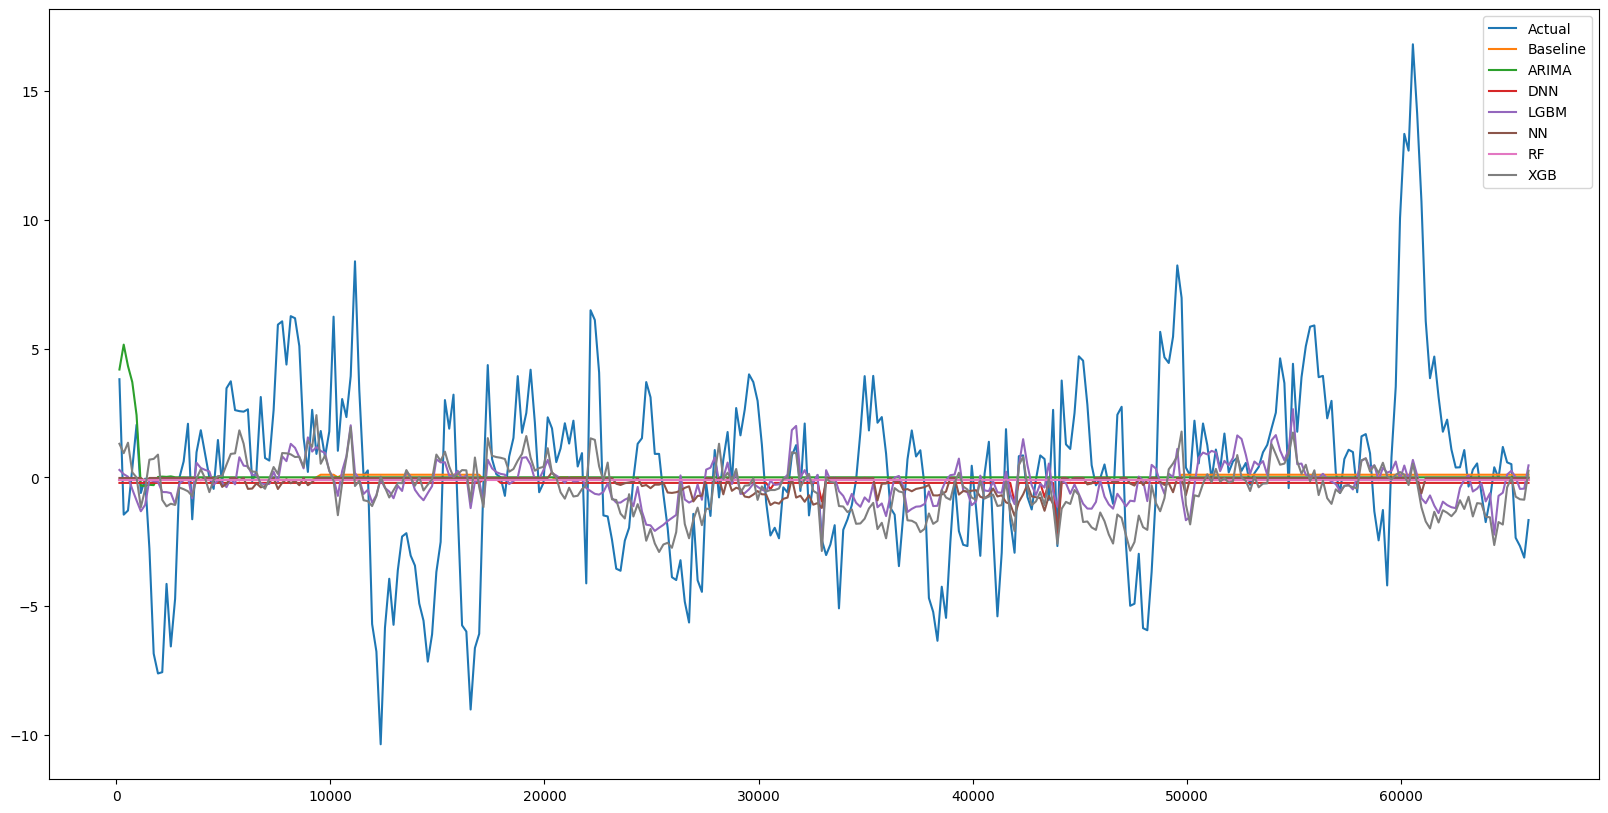

In [122]:
# plot the actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(test_target[test_target['stock_id'] == 151]['target'], label='Actual')
plt.plot(baseline_test_pred[test_target['stock_id'] == 151]['target'], label='Baseline')
plt.plot(arima_test_pred[test_target['stock_id'] == 151]['target'], label='ARIMA')
plt.plot(dnn_test_pred[test_target['stock_id'] == 151]['target'], label='DNN')
plt.plot(lgbm_test_pred[test_target['stock_id'] == 151]['target'], label='LGBM')
plt.plot(nn_test_pred[test_target['stock_id'] == 151]['target'], label='NN')
plt.plot(rf_test_pred[test_target['stock_id'] == 151]['target'], label='RF')
plt.plot(xgb_test_pred[test_target['stock_id'] == 151]['target'], label='XGB')
plt.legend(loc='best')
plt.show()

In [ ]:
# plot MAE for each stock
arima_test_pred['diff'] = np.abs(arima_test_pred['target'] - test_target['target'])
dnn_test_pred['diff'] = np.abs(dnn_test_pred['target'] - test_target['target'])
lgbm_test_pred['diff'] = np.abs(lgbm_test_pred['target'] - test_target['target'])
nn_test_pred['diff'] = np.abs(nn_test_pred['target'] - test_target['target'])
rf_test_pred['diff'] = np.abs(rf_test_pred['target'] - test_target['target'])
xgb_test_pred['diff'] = np.abs(xgb_test_pred['target'] - test_target['target'])

arima_test_pred_mae = arima_test_pred.groupby('stock_id')['diff'].mean()
dnn_test_pred_mae = dnn_test_pred.groupby('stock_id')['diff'].mean()
lgbm_test_pred_mae = lgbm_test_pred.groupby('stock_id')['diff'].mean()
nn_test_pred_mae = nn_test_pred.groupby('stock_id')['diff'].mean()
rf_test_pred_mae = rf_test_pred.groupby('stock_id')['diff'].mean()
xgb_test_pred_mae = xgb_test_pred.groupby('stock_id')['diff'].mean()

In [ ]:
# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3)

# Plot the first two graphs on the top row
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Plot 1')
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('Plot 2')

# Plot the next three graphs on the bottom row
axs[1, 0].plot(x, y1)
axs[1, 0].set_title('Plot 3')
axs[1, 1].plot(x, y2)
axs[1, 1].set_title('Plot 4')
axs[1, 2].plot(x, y3)
axs[1, 2].set_title('Plot 5')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
arima_test_pred

,target,stock_id,diff
0,6.511182e-01,0,-5.530951
1,2.830689e+00,1,-2.160733
2,-2.414776e+00,2,17.274214
3,-2.323376e+00,3,0.593649
4,-2.423109e+00,4,-1.007139
...,...,...,...
65995,0.000000e+00,195,2.310276
65996,-2.804855e+00,196,-5.415222
65997,-2.470000e-146,197,1.169443
65998,1.526728e-25,198,-1.540184


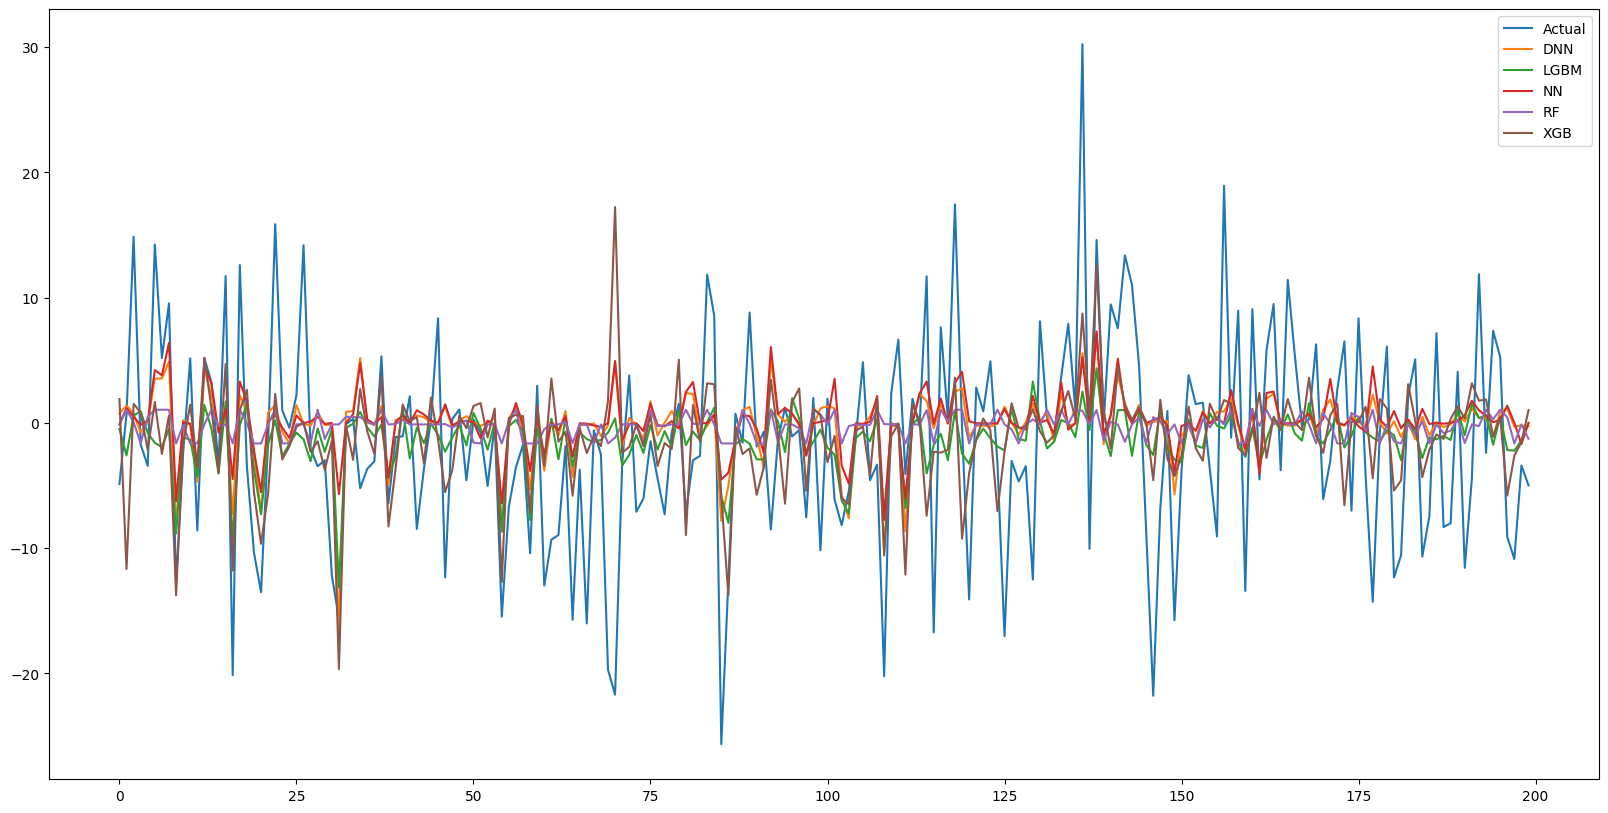

In [24]:
# plot the actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(test_target[:200], label='Actual')
# plt.plot(arima_test_pred[:200], label='ARIMA')
plt.plot(dnn_test_pred[:200], label='DNN')
plt.plot(lgbm_test_pred[:200], label='LGBM')
plt.plot(nn_test_pred[:200], label='NN')
plt.plot(rf_test_pred[:200], label='RF')
plt.plot(xgb_test_pred[:200], label='XGB')
plt.legend(loc='best')
plt.show()


In [20]:
# convert prediction result to series
arima_test_pred = pd.Series(arima_test_pred[0])

In [21]:
arima_test_pred

0         6.511182e-01
1         2.830689e+00
2        -2.414776e+00
3        -2.323376e+00
4        -2.423109e+00
             ...      
65995     0.000000e+00
65996    -2.804855e+00
65997   -2.470000e-146
65998     1.526728e-25
65999    -1.760125e+00
Name: 0, Length: 66000, dtype: float64

In [22]:
arima_test_pred - test_target

0         5.530951
1         2.160733
2       -17.274214
3        -0.593649
4         1.007139
           ...    
65995    -2.310276
65996     5.415222
65997    -1.169443
65998     1.540184
65999     4.770160
Length: 66000, dtype: float64

In [ ]:
test_target - arima_test_pred

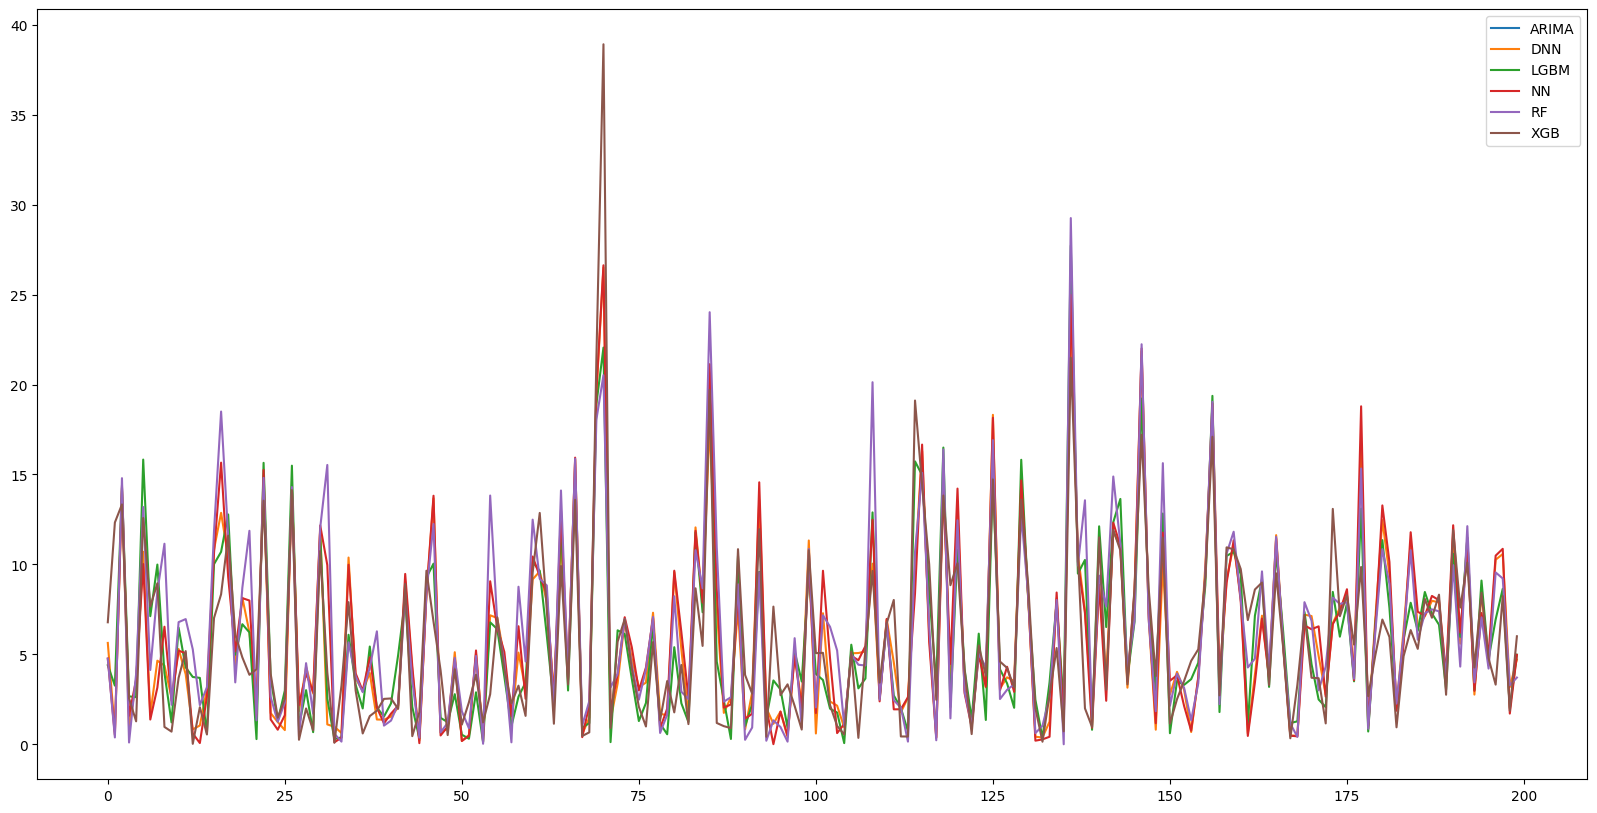

In [23]:

# calculate difference between actual and predicted values
arima_diff = np.abs(test_target - pd.Series(arima_test_pred[0]))
dnn_diff = np.abs(test_target - pd.Series(dnn_test_pred[0]))
lgbm_diff = np.abs(test_target - pd.Series(lgbm_test_pred[0]))
nn_diff = np.abs(test_target - pd.Series(nn_test_pred[0]))
rf_diff = np.abs(test_target - pd.Series(rf_test_pred[0]))
xgb_diff = np.abs(test_target - pd.Series(xgb_test_pred[0]))

# plot the difference between actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(arima_diff[:200], label='ARIMA')
plt.plot(dnn_diff[:200], label='DNN')
plt.plot(lgbm_diff[:200], label='LGBM')
plt.plot(nn_diff[:200], label='NN')
plt.plot(rf_diff[:200], label='RF')
plt.plot(xgb_diff[:200], label='XGB')
plt.legend(loc='best')
plt.show()

In [ ]:
arima_diff